# JDC Preliminary Sales Exploration (2020–2024)
This notebook provides an initial exploratory analysis of Jewelry Design Center's sales data, focusing on revenue streams and product-specific breakdowns to inform deeper modeling and forecasting.

#### Exploring the full sales dataset - 2020-2024
 - Revenue stream breakdown + Visual
 - Retail sales filtering + Visual

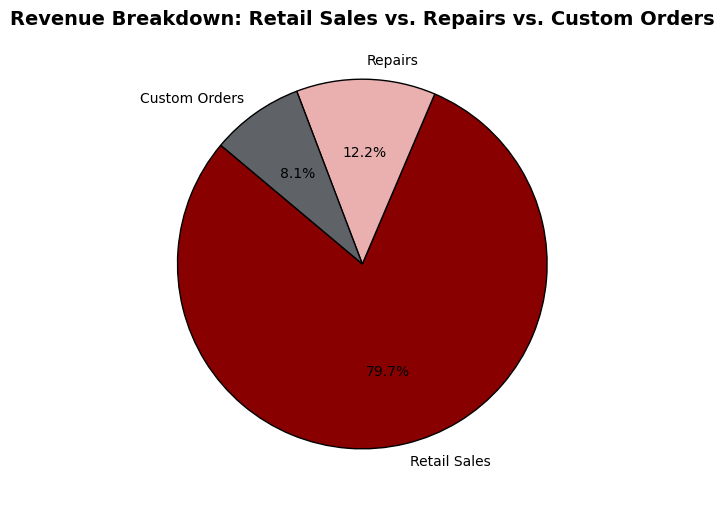

/var/folders/0z/mv9ttjcj47b785v4ktts6yjh0000gn/T/ipykernel_91283/2033075771.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


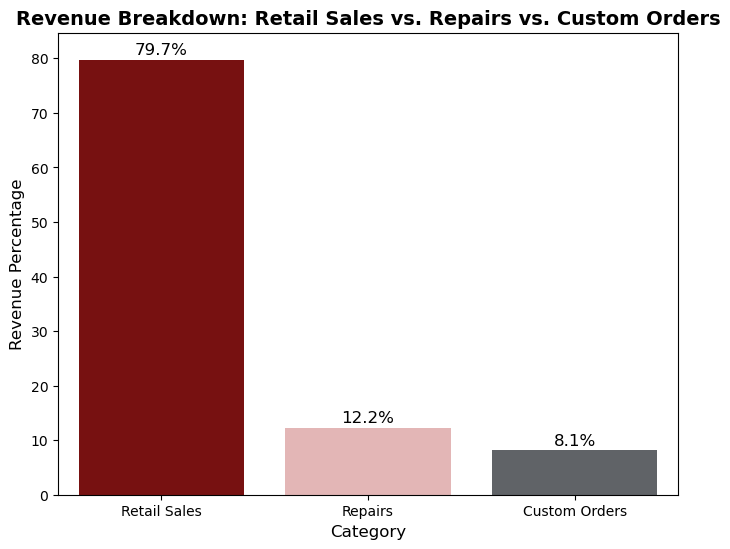

/var/folders/0z/mv9ttjcj47b785v4ktts6yjh0000gn/T/ipykernel_91283/2033075771.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


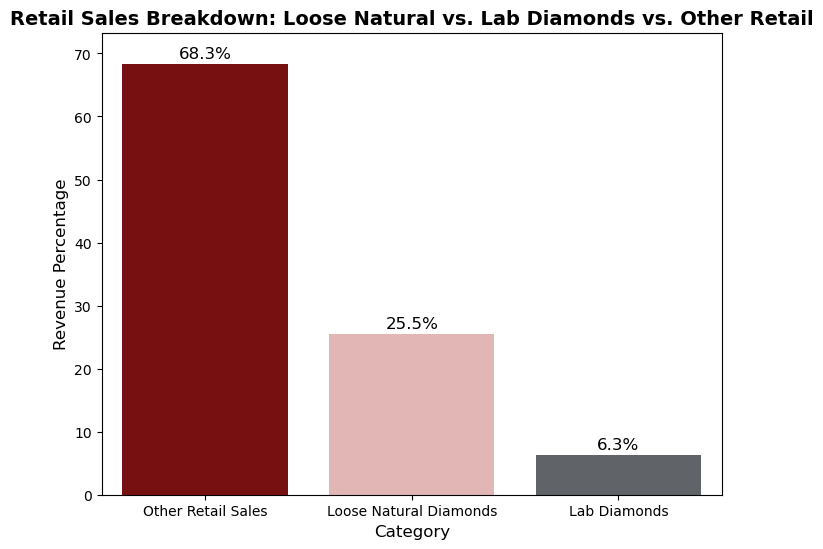

In [1]:
# Import necessary libraries
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set up Google BigQuery connection
project_id = "capstone-project-2025-449217"
dataset_id = "jdc_data"
table_name = f"{project_id}.{dataset_id}.sales"

# Initialize BigQuery client
client = bigquery.Client(project=project_id)

# SQL Query to get revenue breakdown
query = f"""
SELECT 
    category,
    SUM(sale_total) AS total_revenue
FROM (
    SELECT 
        sale_total,
        CASE 
            WHEN trans_type IN ('Sale', 'Lay-PkUp', 'SO-PkUp') 
                 AND inv_type IN ('Stock', 'Special Order', 'Memo', 'Assembled', 'Built', 'Joined') THEN 'Retail Sales'
            WHEN trans_type IN ('Rep-PkUp', 'Quick Rep.') THEN 'Repairs'
            WHEN trans_type IN ('Custm-PkUp', 'Quick Custom', 'Custm-PostAdj')
                 OR inv_type = 'Custom' THEN 'Custom Orders'
            ELSE 'Other'
        END AS category
    FROM `{table_name}`
) grouped_data
WHERE category != 'Other'  -- Exclude 'Other' category
GROUP BY category
ORDER BY total_revenue DESC
"""

# Run the query
df = client.query(query).to_dataframe()

# Normalize revenue percentage
df["revenue_percentage"] = (df["total_revenue"] / df["total_revenue"].sum()) * 100

# Define colors
colors = ["#880000", "#eaafaf", "#5f6368"]  # Maroon (Retail), Pink (Repairs), Gray (Custom)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    df["revenue_percentage"],
    labels=df["category"],
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black"}
)

# Add title
plt.title("Revenue Breakdown: Retail Sales vs. Repairs vs. Custom Orders", fontsize=14, fontweight="bold")

# Show the plot
plt.show()



# Run the query
df = client.query(query).to_dataframe()

# Normalize revenue percentage
df["revenue_percentage"] = (df["total_revenue"] / df["total_revenue"].sum()) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=df["category"], 
    y=df["revenue_percentage"], 
    palette=colors
)

# Add labels and title
plt.ylabel("Revenue Percentage", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.title("Revenue Breakdown: Retail Sales vs. Repairs vs. Custom Orders", fontsize=14, fontweight="bold")

# Display percentage values on bars
for index, value in enumerate(df["revenue_percentage"]):
    plt.text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=12)

# Show the plot
plt.ylim(0, max(df["revenue_percentage"]) + 5)
plt.show()



# SQL Query to get revenue breakdown for Retail Sales (Excluding Repairs & Custom)
query = f"""
SELECT 
    CASE 
        WHEN category_num = '190' THEN 'Loose Natural Diamonds'
        WHEN category_num = '195' THEN 'Lab Diamonds'
        ELSE 'Other Retail Sales'
    END AS category_group,
    SUM(sale_total) AS total_revenue
FROM `{table_name}`
WHERE trans_type IN ('Sale', 'Lay-PkUp', 'SO-PkUp')  -- Ensure only Retail Sales transactions
GROUP BY category_group
ORDER BY total_revenue DESC
"""

# Run the query
df = client.query(query).to_dataframe()

# Normalize revenue percentage
df["revenue_percentage"] = (df["total_revenue"] / df["total_revenue"].sum()) * 100

# Define colors
colors = ["#880000", "#eaafaf", "#5f6368"]  # Maroon (Other Retail), Pink (Loose Natural), Gray (Lab Diamonds)

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=df["category_group"], 
    y=df["revenue_percentage"], 
    palette=colors
)

# Add labels and title
plt.ylabel("Revenue Percentage", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.title("Retail Sales Breakdown: Loose Natural vs. Lab Diamonds vs. Other Retail", fontsize=14, fontweight="bold")

# Display percentage values on bars
for index, value in enumerate(df["revenue_percentage"]):
    plt.text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=12)

# Show the plot
plt.ylim(0, max(df["revenue_percentage"]) + 5)
plt.show()


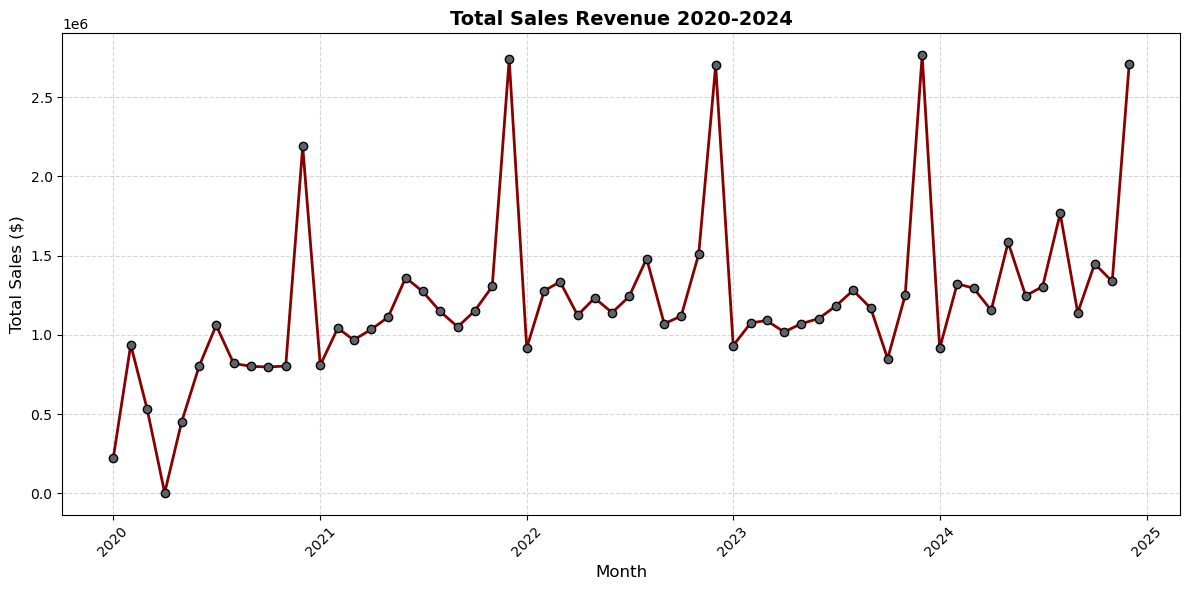

In [2]:
# SQL Query to get total monthly sales
query = f"""
SELECT 
    DATE_TRUNC(sold_date, MONTH) AS month,
    SUM(sale_total) AS total_sales
FROM `{table_name}`
WHERE sale_total IS NOT NULL
GROUP BY month
ORDER BY month
"""

# Run the query
df = client.query(query).to_dataframe()

# Plotting
plt.figure(figsize=(12, 6))

# Plot the line chart using JDC maroon
plt.plot(df["month"], df["total_sales"], color="#880000", linewidth=2, marker='o', markerfacecolor="#5f6368", markeredgecolor="black")

# Title and labels
plt.title("Total Sales Revenue 2020-2024", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)

# Rotate x-axis ticks for clarity
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


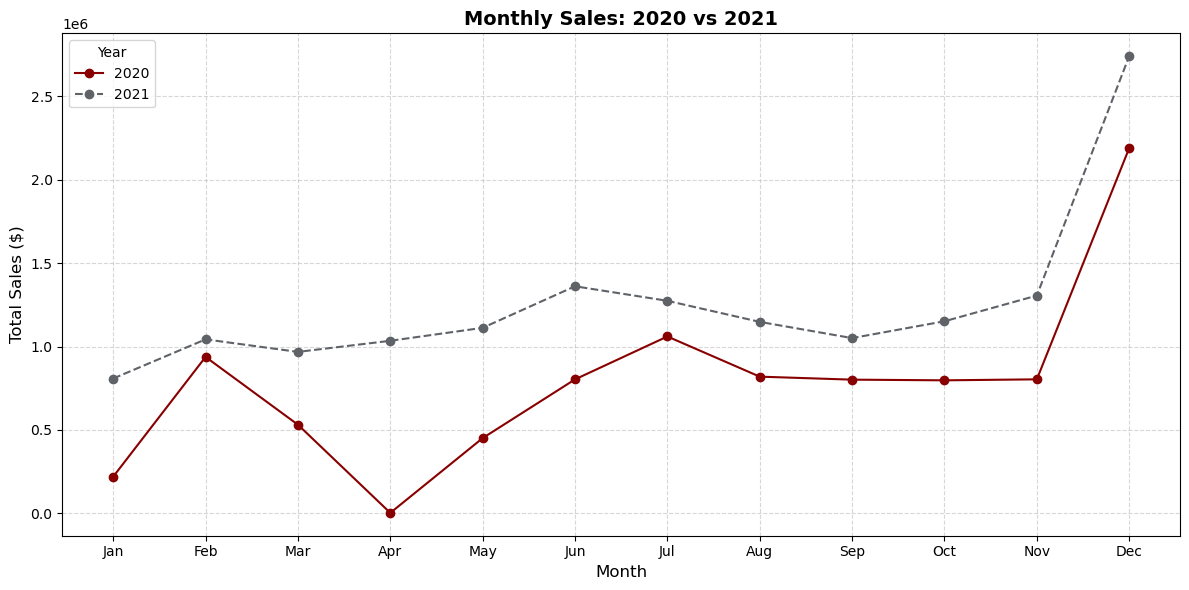

In [3]:
# SQL Query to get monthly sales for 2020 and 2021
query = f"""
SELECT 
    EXTRACT(YEAR FROM sold_date) AS year,
    EXTRACT(MONTH FROM sold_date) AS month,
    SUM(sale_total) AS total_sales
FROM `{table_name}`
WHERE EXTRACT(YEAR FROM sold_date) IN (2020, 2021)
GROUP BY year, month
ORDER BY year, month
"""

# Run the query
df = client.query(query).to_dataframe()

# Convert month number to month name for display
df["month_name"] = pd.to_datetime(df["month"], format='%m').dt.strftime('%b')

# Pivot data for plotting
pivot_df = df.pivot(index="month", columns="year", values="total_sales").sort_index()
pivot_df.index = pd.to_datetime(pivot_df.index, format='%m').strftime('%b')

# Plotting
plt.figure(figsize=(12, 6))

# Plot each year with custom colors
plt.plot(pivot_df.index, pivot_df[2020], marker='o', label="2020", color="#880000")  # Maroon
plt.plot(pivot_df.index, pivot_df[2021], marker='o', linestyle="--", label="2021", color="#5f6368")  # Gray dashed

# Add title and labels
plt.title("Monthly Sales: 2020 vs 2021", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(title="Year")

# Display the chart
plt.tight_layout()
plt.show()


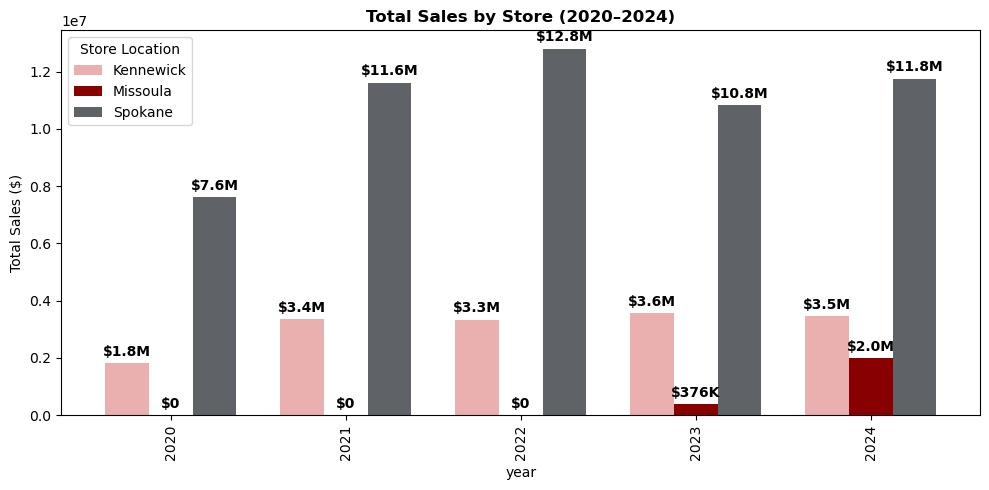

In [4]:
from matplotlib.ticker import FuncFormatter

# SQL Query
query = f"""
SELECT 
    EXTRACT(YEAR FROM sold_date) AS year,
    location,
    SUM(sale_total) AS total_sales
FROM `{table_name}`
WHERE sold_date IS NOT NULL
GROUP BY year, location
ORDER BY year, location
"""

# Run the query
df = client.query(query).to_dataframe()

# Map store numbers to names
location_map = {1: "Spokane", 2: "Kennewick", 3: "Missoula"}
df["location"] = df["location"].map(location_map)

# Pivot data
pivot_df = df.pivot(index="year", columns="location", values="total_sales").fillna(0)

# Set color mapping (in correct order for plotting)
colors = {
    "Kennewick": "#eaafaf",  # Pink
    "Missoula": "#880000",   # Maroon
    "Spokane": "#5f6368"     # Gray
}
ordered_columns = ["Kennewick", "Missoula", "Spokane"]
pivot_df = pivot_df[ordered_columns]

# Plotting
ax = pivot_df.plot(
    kind="bar",
    figsize=(10, 5),           # Slightly smaller for tighter layout
    width=0.75,                # Wider bars
    color=[colors[col] for col in pivot_df.columns]
)

# Format numbers like $3.4M, $334K, etc.
def format_dollar(val, _):
    if val >= 1e6:
        return f"${val/1e6:.1f}M"
    elif val >= 1e3:
        return f"${val/1e3:.0f}K"
    else:
        return f"${val:.0f}"

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, labels=[
        format_dollar(val, None) for val in container.datavalues
    ], fontsize=10, fontweight="bold", padding=3)

# Title and axes labels
plt.title("Total Sales by Store (2020–2024)", fontsize=12, fontweight="bold")
#plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=10)
plt.legend(title="Store Location")

# Clean layout
plt.tight_layout()
plt.show()


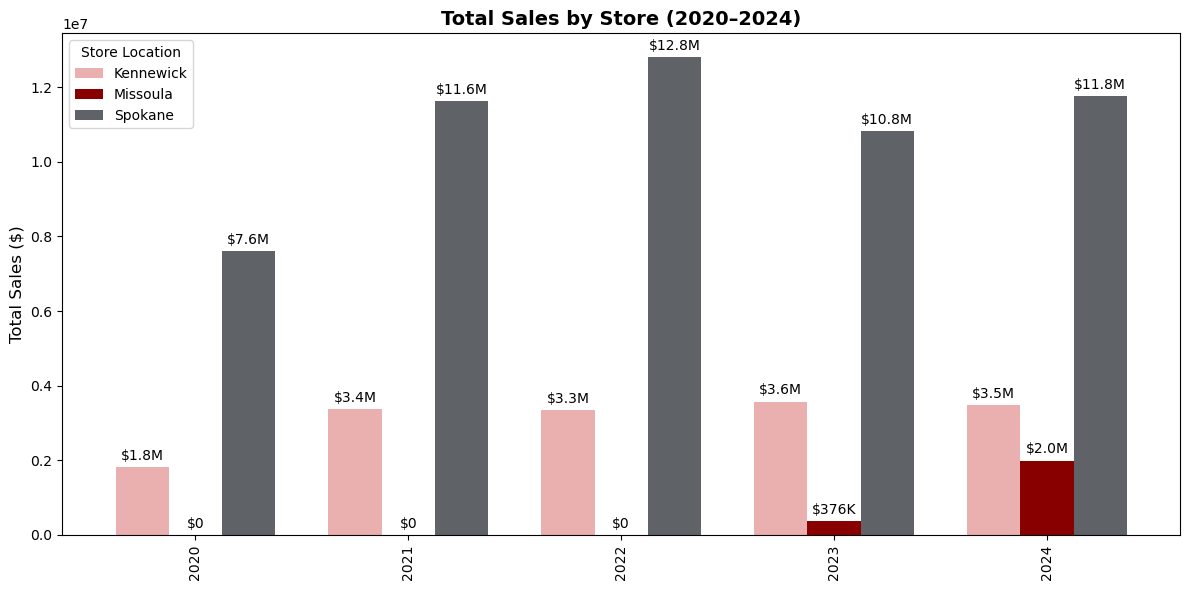

In [5]:
# SQL Query
query = f"""
SELECT 
    EXTRACT(YEAR FROM sold_date) AS year,
    location,
    SUM(sale_total) AS total_sales
FROM `{table_name}`
WHERE sold_date IS NOT NULL
GROUP BY year, location
ORDER BY year, location
"""

# Run the query
df = client.query(query).to_dataframe()

# Map numeric locations to store names
location_map = {1: "Spokane", 2: "Kennewick", 3: "Missoula"}
df["location"] = df["location"].map(location_map)

# Pivot for grouped bar chart
pivot_df = df.pivot(index="year", columns="location", values="total_sales").fillna(0)

# Order the columns visually
ordered_columns = ["Kennewick", "Missoula", "Spokane"]
pivot_df = pivot_df[ordered_columns]

# JDC color scheme
colors = {
    "Kennewick": "#eaafaf",  # Pink
    "Missoula": "#880000",   # Maroon
    "Spokane": "#5f6368"     # Gray
}

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Taller chart for large labels
pivot_df.plot(kind="bar", ax=ax, width=0.75, color=[colors[col] for col in pivot_df.columns])

# Format labels as $K / $M
def format_dollar(val):
    if val >= 1e6:
        return f"${val/1e6:.1f}M"
    elif val >= 1e3:
        return f"${val/1e3:.0f}K"
    else:
        return f"${val:.0f}"

# Add text labels above each bar
for container in ax.containers:
    ax.bar_label(container, labels=[format_dollar(v) for v in container.datavalues],
                 fontsize=10, padding=3)

# Titles and axes
ax.set_title("Total Sales by Store (2020–2024)", fontsize=14, fontweight="bold")
ax.set_ylabel("Total Sales ($)", fontsize=12)
ax.set_xlabel("")  # Remove "Year" label
ax.legend(title="Store Location")

# Clean layout
plt.tight_layout()
plt.show()


#### Deep Dive Into Watches


In [6]:
def analyze_watch_sales(client):
    # Step 1: Query Watch Sales from filtered_retail_sales
    query = """
        SELECT 
            EXTRACT(YEAR FROM sold_date) AS year,
            vendor,
            SAFE_CAST(qty AS INT64) AS total_units_sold,
            SAFE_CAST(sale_total AS FLOAT64) AS total_sales
        FROM `capstone-project-2025-449217.jdc_data.filtered_retail_sales`
        WHERE category_name = 'Watch'
          AND SAFE_CAST(sale_total AS FLOAT64) IS NOT NULL
          AND SAFE_CAST(qty AS INT64) IS NOT NULL
    """
    
    # Step 2: Load to DataFrame
    df = client.query(query).to_dataframe()
    
    # Step 3: Clean Columns
    df.columns = df.columns.str.lower()

    # Step 4: Calculate YOY % Change
    # Step 4: Calculate YOY Change
    df = df.sort_values(by=['vendor', 'year'])

    # Optional clarity: Raw dollar change instead of %
    df['sales_yoy_change'] = df.groupby('vendor')['total_sales'].diff()





    # Step 7: YOY % Change Heatmap (Sales)
    heatmap_df = df.groupby(['vendor', 'year'])['sales_yoy_change'].mean().reset_index()
    heatmap_pivot = heatmap_df.pivot(index='vendor', columns='year', values='sales_yoy_change')

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap="coolwarm", center=0)
    plt.title('YOY % Change in Sales by Vendor')
    plt.tight_layout()
    plt.show()

    return df


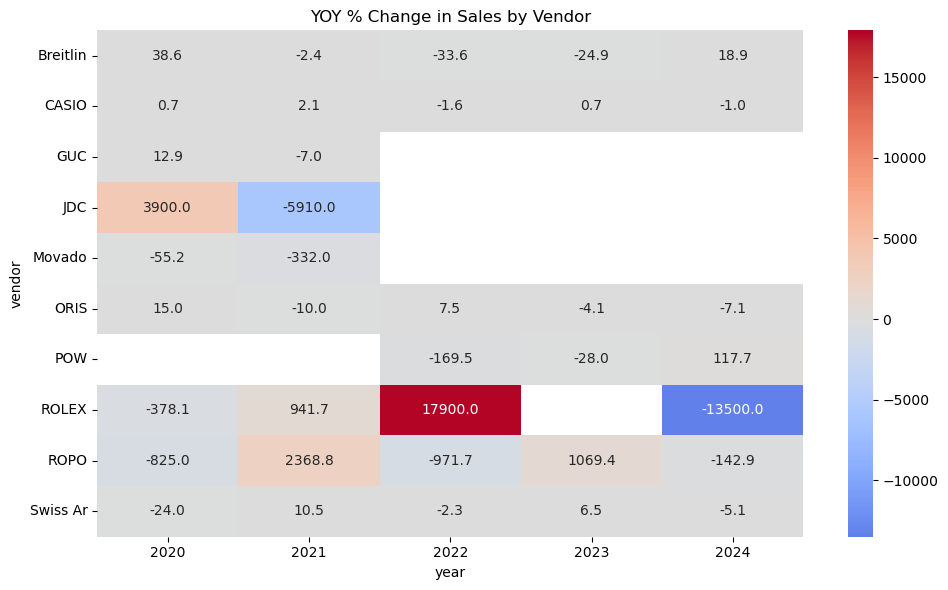

In [7]:
watch_sales_df = analyze_watch_sales(client)


In [8]:
def vendor_watch_sales_summary(client):
    # Query Watch Sales from filtered_retail_sales
    query = """
        SELECT 
            EXTRACT(YEAR FROM sold_date) AS year,
            vendor,
            SAFE_CAST(qty AS INT64) AS total_units_sold,
            SAFE_CAST(sale_total AS FLOAT64) AS total_sales
        FROM `capstone-project-2025-449217.jdc_data.filtered_retail_sales`
        WHERE category_name = 'Watch'
          AND SAFE_CAST(sale_total AS FLOAT64) IS NOT NULL
          AND SAFE_CAST(qty AS INT64) IS NOT NULL
    """

    df = client.query(query).to_dataframe()
    df.columns = df.columns.str.lower()

    # Remove unwanted vendors
    exclude_vendors = ['GUC', 'JDC', 'Movado']
    df = df[~df['vendor'].isin(exclude_vendors)]

    # Total Sales by Vendor
    total_sales = df.groupby('vendor')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

    # Total Units Sold by Vendor
    total_units = df.groupby('vendor')['total_units_sold'].sum().reset_index().sort_values(by='total_units_sold', ascending=False)

    # Plot Total Sales with Labels
    plt.figure(figsize=(12,6))
    sns.barplot(data=total_sales, x='vendor', y='total_sales', palette='muted')
    plt.title('Total Watch Sales ($) by Vendor (2020-2024)')
    plt.xlabel('Vendor')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45)

    for bar in plt.gca().patches:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 10000,
            f'${bar.get_height():,.0f}',
            ha='center', fontsize=10
        )

    plt.tight_layout()
    plt.show()

    # Plot Total Units Sold with Labels
    plt.figure(figsize=(12,6))
    sns.barplot(data=total_units, x='vendor', y='total_units_sold', palette='muted')
    plt.title('Total Units Sold by Vendor (2020-2024)')
    plt.xlabel('Vendor')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45)

    for bar in plt.gca().patches:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 5,
            f'{int(bar.get_height())}',
            ha='center', fontsize=10
        )

    plt.tight_layout()
    plt.show()

    return total_sales, total_units


/var/folders/0z/mv9ttjcj47b785v4ktts6yjh0000gn/T/ipykernel_91283/1807582306.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_sales, x='vendor', y='total_sales', palette='muted')


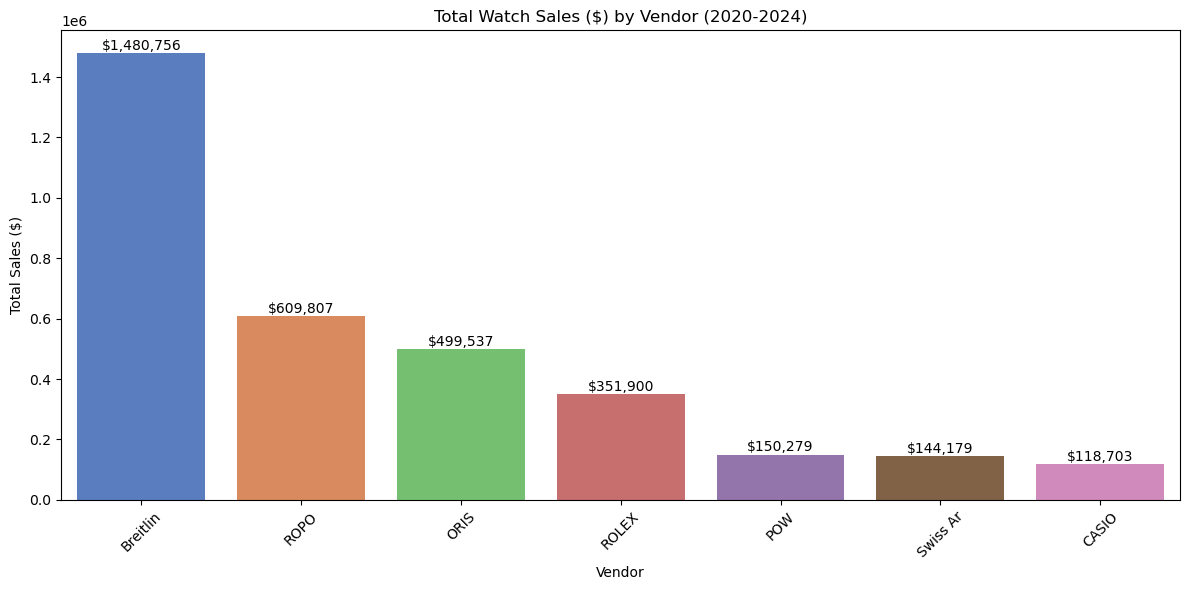

/var/folders/0z/mv9ttjcj47b785v4ktts6yjh0000gn/T/ipykernel_91283/1807582306.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_units, x='vendor', y='total_units_sold', palette='muted')


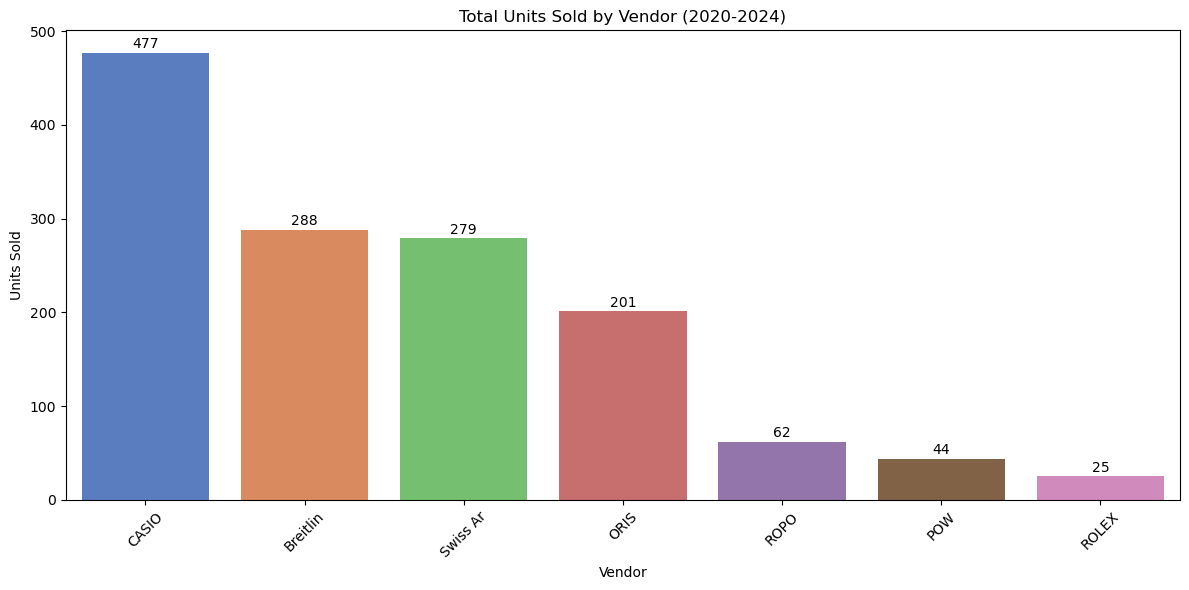

In [9]:
total_sales_df, total_units_df = vendor_watch_sales_summary(client)


In [12]:
def vendor_watch_sales_summary(client):
    # Step 1: Query BigQuery
    query = """ 
        SELECT EXTRACT(YEAR FROM sold_date) AS year,
               vendor,
               SAFE_CAST(qty AS INT64) AS total_units_sold,
               SAFE_CAST(sale_total AS FLOAT64) AS total_sales
        FROM `capstone-project-2025-449217.jdc_data.filtered_retail_sales`
        WHERE category_name = 'Watch'
          AND SAFE_CAST(sale_total AS FLOAT64) IS NOT NULL
          AND SAFE_CAST(qty AS INT64) IS NOT NULL
    """

    df = client.query(query).to_dataframe()
    df.columns = df.columns.str.lower()

    # Step 2: Exclude Vendors
    exclude_vendors = ['GUC', 'JDC', 'Movado']
    df = df[~df['vendor'].isin(exclude_vendors)]

    # Step 3: Total Sales & Units by Vendor Overall (already done)
    total_sales = df.groupby('vendor')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
    total_units = df.groupby('vendor')['total_units_sold'].sum().reset_index().sort_values(by='total_units_sold', ascending=False)

    # --- NEW ANALYSIS --- Total Sales + Units + Avg Price by Vendor by Year ---
    summary_df = df.groupby(['year', 'vendor']).agg({
        'total_sales': 'sum',
        'total_units_sold': 'sum'
    }).reset_index()

    summary_df['avg_price'] = summary_df['total_sales'] / summary_df['total_units_sold']

    # Horizontal Bar Chart: Total Sales by Vendor by Year
    plt.figure(figsize=(14,8))
    ax = sns.barplot(data=summary_df, y='vendor', x='total_sales', hue='year', palette='muted', dodge=0.7)
    plt.title('Total Watch Sales ($) by Vendor by Year')
    plt.xlabel('Total Sales ($)')
    plt.ylabel('Vendor')
    plt.legend(title='Year', bbox_to_anchor=(1, 1))

    # Add labels to each bar
    for bar in ax.patches:
        width = bar.get_width()
        if width >= 5000:  # Only label meaningful bars
            plt.text(
                width + 5000,
                bar.get_y() + bar.get_height() / 2,
                f'${width:,.0f}',
                ha='left', va='center', fontsize=10
        )

    plt.tight_layout()
    plt.show()


    return total_sales, total_units, summary_df


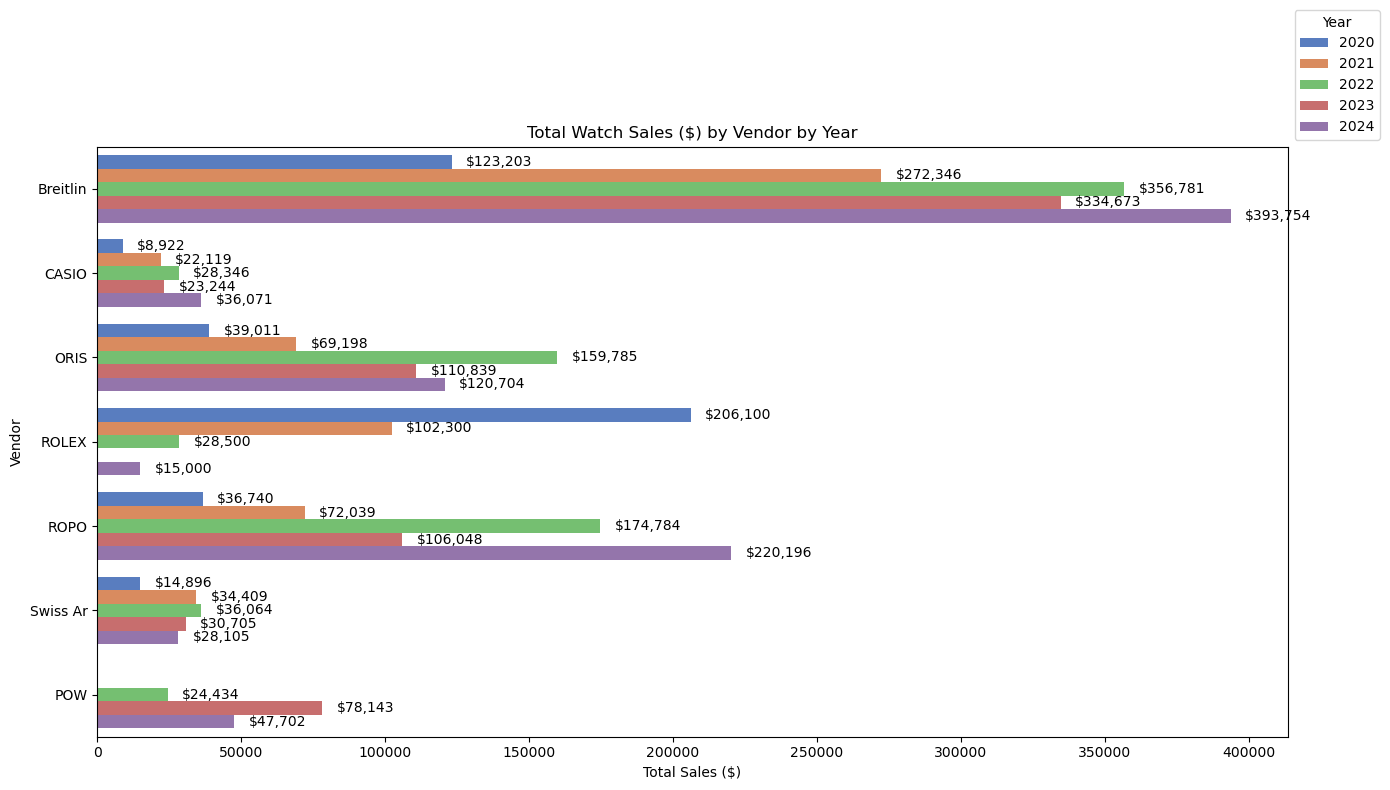

In [52]:
total_sales_df, total_units_df, summary_df = vendor_watch_sales_summary(client)
